<a href="https://colab.research.google.com/github/Rajeeb321123/Deep-learning-tensorFlow-Journey/blob/master/03_introduction_to_computer_vision_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolution Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of  writing algorithms which can discover patterns in visual data. Such as the camera of self-driving car recognizing the car infront.

## Get the data

The images we're working with are from Food101 dataset
(101 different classes of food): https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

However we've modeified it to only use two classes (pizza🍕 & steak) using the images image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑**Note** We start with a smaller data so we can experiment quickly and figure what works(or better yet what doesn't work)



In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip  #wget means: get this file and download in colab

# Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-02-19 21:00:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.207, 209.85.234.207, 108.177.112.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   224MB/s    in 0.5s    

2024-02-19 21:00:48 (224 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial set at the beginning of any machine learning project is becoming one with the data
And for a computer vision project... this is usually means visualizing many samples of data.

In [3]:
!ls pizza_steak   # ls means: list file in the pizza_steak folder


test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [6]:
import os
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directoreis and {len(filenames)} images in'{dirpath}'.")

There are 2 directoreis and 0 images in'pizza_steak'.
There are 2 directoreis and 0 images in'pizza_steak/test'.
There are 0 directoreis and 250 images in'pizza_steak/test/steak'.
There are 0 directoreis and 250 images in'pizza_steak/test/pizza'.
There are 2 directoreis and 0 images in'pizza_steak/train'.
There are 0 directoreis and 750 images in'pizza_steak/train/steak'.
There are 0 directoreis and 750 images in'pizza_steak/train/pizza'.


In [7]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Feb 19 21:00 .
drwxr-xr-x 1 root root 4096 Feb 19 21:00 ..
drwxr-xr-x 4 root root 4096 Feb 19 21:00 test
drwxr-xr-x 4 root root 4096 Feb 19 21:00 train


In [8]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))  # listdir is method to list all the names in directories

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [9]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from subdirectories
print(class_names)

['pizza' 'steak']


In [10]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# to select image randomly image
def view_random_image(target_dir, target_class): #target_dir in directory, target_class is either steak or pizza here
  # Setup the target directory (we'll view iamges from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder  + "/" + random_image[0]) # we random_image in list format so, we change into string path format to read
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape:{img.shape}") # show the shape of the image

  return img # why we return img because when after read in below it turns into a big array and consider into tensor


['3109486.jpg']
Image shape:(512, 512, 3)


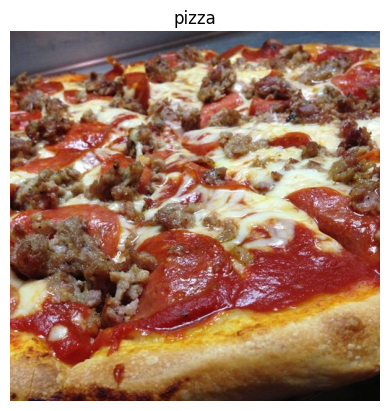

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

array([[[ 76,  67,  72],
        [ 76,  67,  72],
        [ 75,  66,  71],
        ...,
        [ 72,  86, 121],
        [ 73,  87, 122],
        [ 72,  86, 121]],

       [[ 75,  66,  71],
        [ 74,  65,  70],
        [ 73,  64,  69],
        ...,
        [ 69,  84, 117],
        [ 70,  85, 118],
        [ 71,  86, 119]],

       [[ 73,  66,  73],
        [ 73,  66,  73],
        [ 72,  65,  72],
        ...,
        [ 67,  84, 112],
        [ 69,  86, 114],
        [ 70,  87, 115]],

       ...,

       [[142,  83,  39],
        [128,  71,  28],
        [117,  61,  24],
        ...,
        [  8,   8,   6],
        [  8,   8,   6],
        [  8,   8,   6]],

       [[136,  74,  27],
        [125,  64,  19],
        [119,  60,  16],
        ...,
        [  8,   8,   6],
        [  8,   8,   6],
        [  8,   8,   6]],

       [[149,  85,  37],
        [141,  79,  30],
        [138,  77,  32],
        ...,
        [  8,   8,   6],
        [  8,   8,   6],
        [  8,   8,   6]]], dtype=uint8)
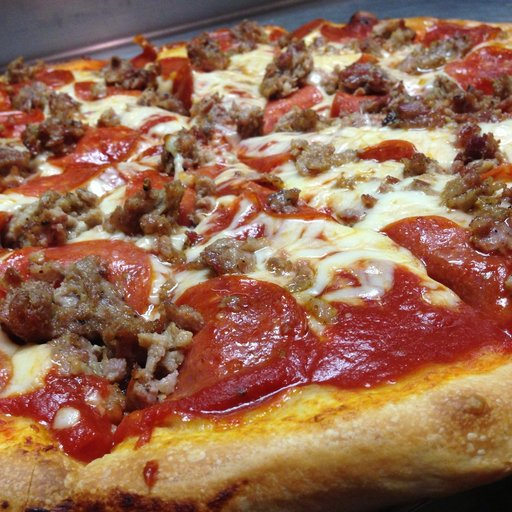

In [12]:
img

In [13]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 76,  67,  72],
        [ 76,  67,  72],
        [ 75,  66,  71],
        ...,
        [ 72,  86, 121],
        [ 73,  87, 122],
        [ 72,  86, 121]],

       [[ 75,  66,  71],
        [ 74,  65,  70],
        [ 73,  64,  69],
        ...,
        [ 69,  84, 117],
        [ 70,  85, 118],
        [ 71,  86, 119]],

       [[ 73,  66,  73],
        [ 73,  66,  73],
        [ 72,  65,  72],
        ...,
        [ 67,  84, 112],
        [ 69,  86, 114],
        [ 70,  87, 115]],

       ...,

       [[142,  83,  39],
        [128,  71,  28],
        [117,  61,  24],
        ...,
        [  8,   8,   6],
        [  8,   8,   6],
        [  8,   8,   6]],

       [[136,  74,  27],
        [125,  64,  19],
        [119,  60,  16],
        ...,
        [  8,   8,   6],
        [  8,   8,   6],
        [  8,   8,   6]],

       [[149,  85,  37],
        [141,  79,  30],
        [138,  77,  32],
        ...,
        [  8,   8,   

In [14]:
# View the image shape
img.shape  # returns width, height, color channels

(512, 512, 3)

🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common perprocessing steps for working with images is to **scale**( also referred to as **normalized**) their pixel values by dividing the image by 255. (since 255 is the maximum pixel value).

In [15]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.29803922, 0.2627451 , 0.28235294],
        [0.29803922, 0.2627451 , 0.28235294],
        [0.29411765, 0.25882353, 0.27843137],
        ...,
        [0.28235294, 0.3372549 , 0.4745098 ],
        [0.28627451, 0.34117647, 0.47843137],
        [0.28235294, 0.3372549 , 0.4745098 ]],

       [[0.29411765, 0.25882353, 0.27843137],
        [0.29019608, 0.25490196, 0.2745098 ],
        [0.28627451, 0.25098039, 0.27058824],
        ...,
        [0.27058824, 0.32941176, 0.45882353],
        [0.2745098 , 0.33333333, 0.4627451 ],
        [0.27843137, 0.3372549 , 0.46666667]],

       [[0.28627451, 0.25882353, 0.28627451],
        [0.28627451, 0.25882353, 0.28627451],
        [0.28235294, 0.25490196, 0.28235294],
        ...,
        [0.2627451 , 0.32941176, 0.43921569],
        [0.27058824, 0.3372549 , 0.44705882],
        [0.2745098 , 0.34117647, 0.45098039]],

       ...,

       [[0.55686275, 0.3254902 , 0.15294118],
        [0.50196078, 0.27843137, 0.10980392],
        [0.45882353, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel value between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches. This will create data and labels automatically for us that can be fitted our created model
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size=(224, 224), # size 224,224 hold good amount of info, but 512, 512 may be too much
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory =test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D (filters=10,
                            kernel_size=3,
                            activation="relu",
                            input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 11s 168ms/step - loss: 0.5907 - accuracy: 0.6807 - val_loss: 0.4408 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 6s 128ms/step - loss: 0.4509 - accuracy: 0.7867 - val_loss: 0.3419 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3994 - accuracy: 0.8240 - val_loss: 0.3395 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3480 - accuracy: 0.8513 - val_loss: 0.2957 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 7s 159ms/step - loss: 0.3056 - accuracy: 0.8773 - val_loss: 0.2896 - val_accuracy: 0.8820


> **Note:** if the above cell is taking longer than ~10 seconds per epoch, make sure you're using GPU in runtime type

In [17]:
len(train_data) # amount of images in each batches

47

In [18]:
1500/32 # we we have slice the 1500 images into 32 batches each with 47 images

46.875

In [20]:
# Get a model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

⚒️ **Exercise:** Go through the CNN explainer website for minimum of 10 minute and compare our neural network with theirs. https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we've build in a previous section to see if it works our image dot.

The model we're building is from *TensorFlow playground*

In [26]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the Tensorflow playground
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )


Epoch 1/5
47/47 [==============================] - 7s 112ms/step - loss: 0.8061 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.4907 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5000


In [27]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 150528)            0         
                                                                 
 dense_17 (Dense)            (None, 4)                 602116    
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), mode_2 perform terribly... let's try to improve it

In [28]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )


Epoch 1/5
47/47 [==============================] - 8s 129ms/step - loss: 2.8834 - accuracy: 0.6380 - val_loss: 0.7210 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 1.0905 - accuracy: 0.6873 - val_loss: 1.2931 - val_accuracy: 0.6600
Epoch 3/5
47/47 [==============================] - 6s 127ms/step - loss: 0.7910 - accuracy: 0.7127 - val_loss: 0.5675 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.5379 - accuracy: 0.7853 - val_loss: 0.4800 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 6s 126ms/step - loss: 0.7519 - accuracy: 0.7420 - val_loss: 0.6245 - val_accuracy: 0.7320


In [29]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 150528)            0         
                                                                 
 dense_20 (Dense)            (None, 100)               15052900  
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
